In [ ]:
!pip install networkx
!pip install ogb

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./edges.csv', header=None, skiprows=1)
df = df.sort_values(by=0)
print(df.head())

lb = pd.read_csv('./node_labels.csv', header=None, skiprows=1)
print(lb.head())

    0       1
0   1   15017
1   4   20524
2  10   11299
3  15   21801
4  18  196170
   0
0  0
1  1
2  2
3  3
4  2


In [28]:
label_list = lb[0].tolist()

# 统计label的值
label_st = set(label_list)
color_num = len(label_st)

label_list[:5]

[0, 1, 2, 3, 2]

In [29]:
def customized_edges(data, label_list):
    deduplication = set()
    edge_list = []
    for row in data:
        edge_start = str(row[0]) + '\n' + str(label_list[row[0]])
        edge_end = str(row[1]) + '\n' + str(label_list[row[1]])
        edge = (edge_start, edge_end)
        
        before_len = len(deduplication)
        deduplication.add(edge)
        after_len = len(deduplication)
        
        if before_len != after_len:
            edge_list.append(edge)
    
    print(edge_list[:10])
    return edge_list

sorted_list = df.values.tolist()
edge_list = customized_edges(sorted_list, label_list)

[[1, 15017], [4, 20524], [10, 11299], [15, 21801], [18, 196170]]


[('1\n1', '15017\n3'),
 ('4\n2', '20524\n13'),
 ('10\n8', '11299\n8'),
 ('15\n11', '21801\n11'),
 ('18\n5', '196170\n5'),
 ('23\n14', '19795\n14'),
 ('33\n7', '2244\n7'),
 ('39\n19', '92313\n19'),
 ('48\n22', '82123\n22'),
 ('56\n24', '20603\n24')]

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def customize_style(G, color_num):
    # 按内容分组
    color_map = {}
    color_index = 0
    colors = plt.get_cmap('tab20', color_num)  # 选择调色板
    
    for node in G.nodes():
        group_key = node.split('\n')[1]  # 使用换行符后的部分作为分组依据
        if group_key not in color_map:
            color_map[group_key] = colors(color_index)
            color_index += 1
    
    # 为每个节点分配颜色
    node_colors = [color_map[node.split('\n')[1]] for node in G.nodes()]
    
    # 设置边的颜色
    edge_colors = []
    for u, v in G.edges():
        if color_map[u.split('\n')[1]] != color_map[v.split('\n')[1]]:
            edge_colors.append('red')  # 如果两个节点颜色不同，则边为红色
        else:
            edge_colors.append('black')  # 默认边颜色为黑色
    
    return node_colors, edge_colors


def draw_network(G, color_num, seed=47):
    node_colors, edge_colors = customize_style(G, color_num)
    # 画布大小
    plt.figure(figsize=(20, 15))
    # 设置节点分布
    pos = nx.forceatlas2_layout(G, scaling_ratio=6.0, strong_gravity=True, seed=seed)
    # 图属性
    nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=1000, font_size=7, font_color='black', edge_color=edge_colors)
    
    # 显示图形
    plt.title("Visualization of any two hundred edges in the dataset")
    plt.show()

C:\Users\15723\AppData\Local\Temp\ipykernel_26928\85269840.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', color_num)  # 选择调色板


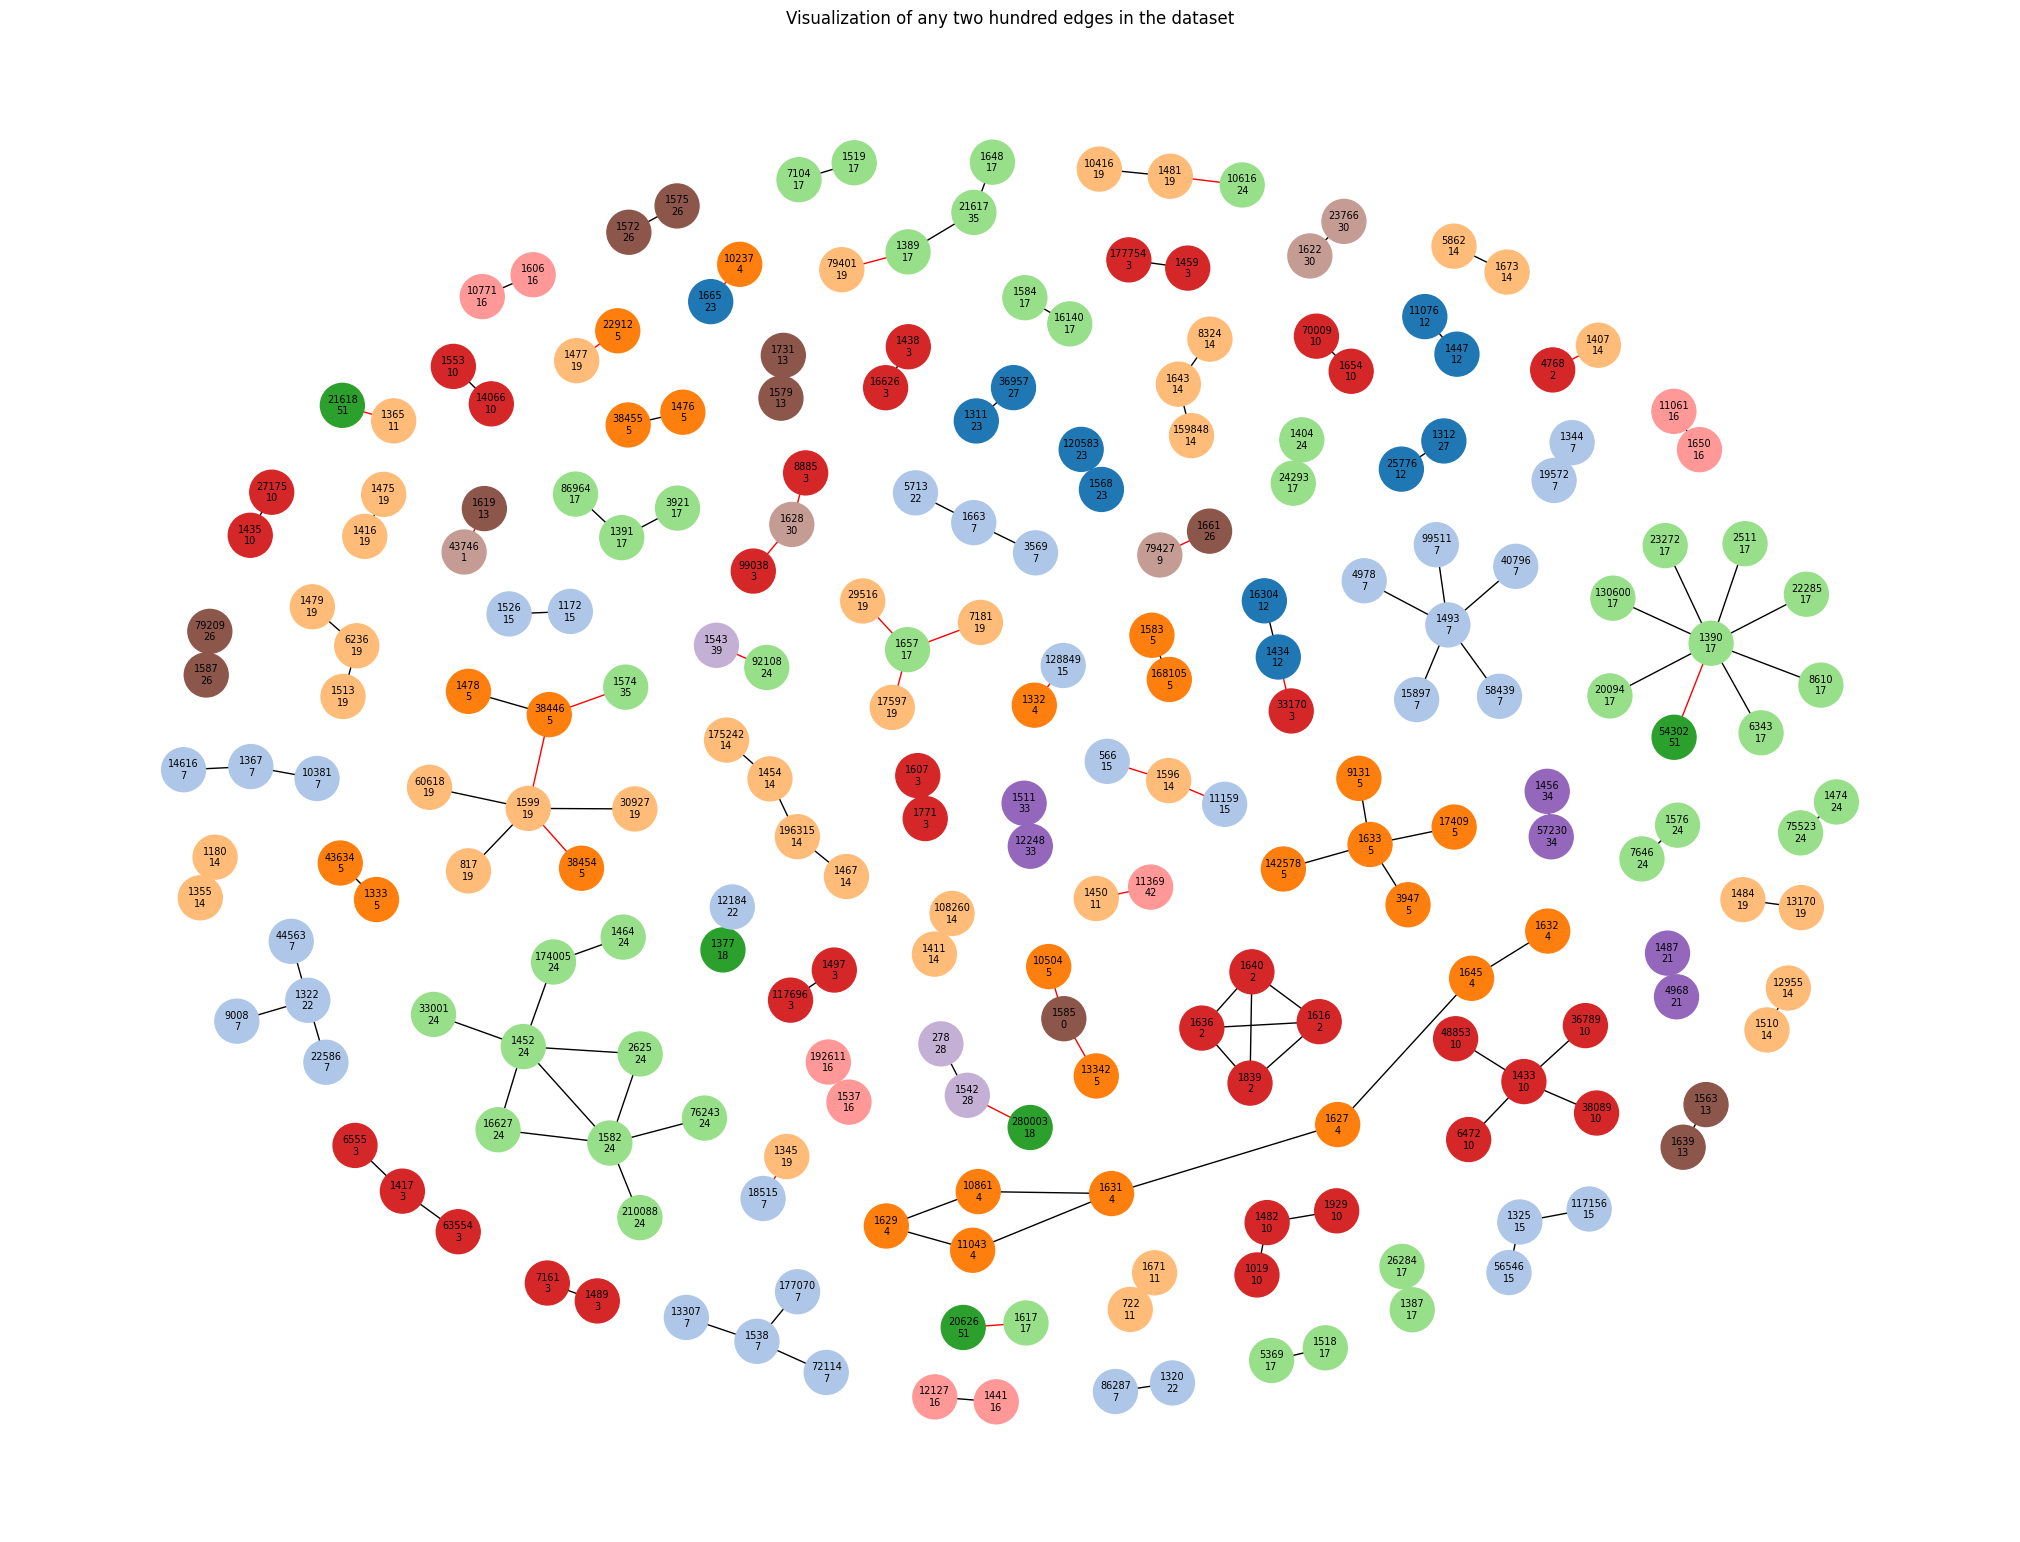

In [33]:
# 创建图对象，画两百条边
G = nx.Graph(edge_list[500:650])
draw_network(G, color_num)
# # 画孤立结点
# isolated_nodes = [99999]
# G.add_nodes_from(isolated_nodes)

C:\Users\15723\AppData\Local\Temp\ipykernel_26928\3595366882.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', color_num)  # 选择调色板


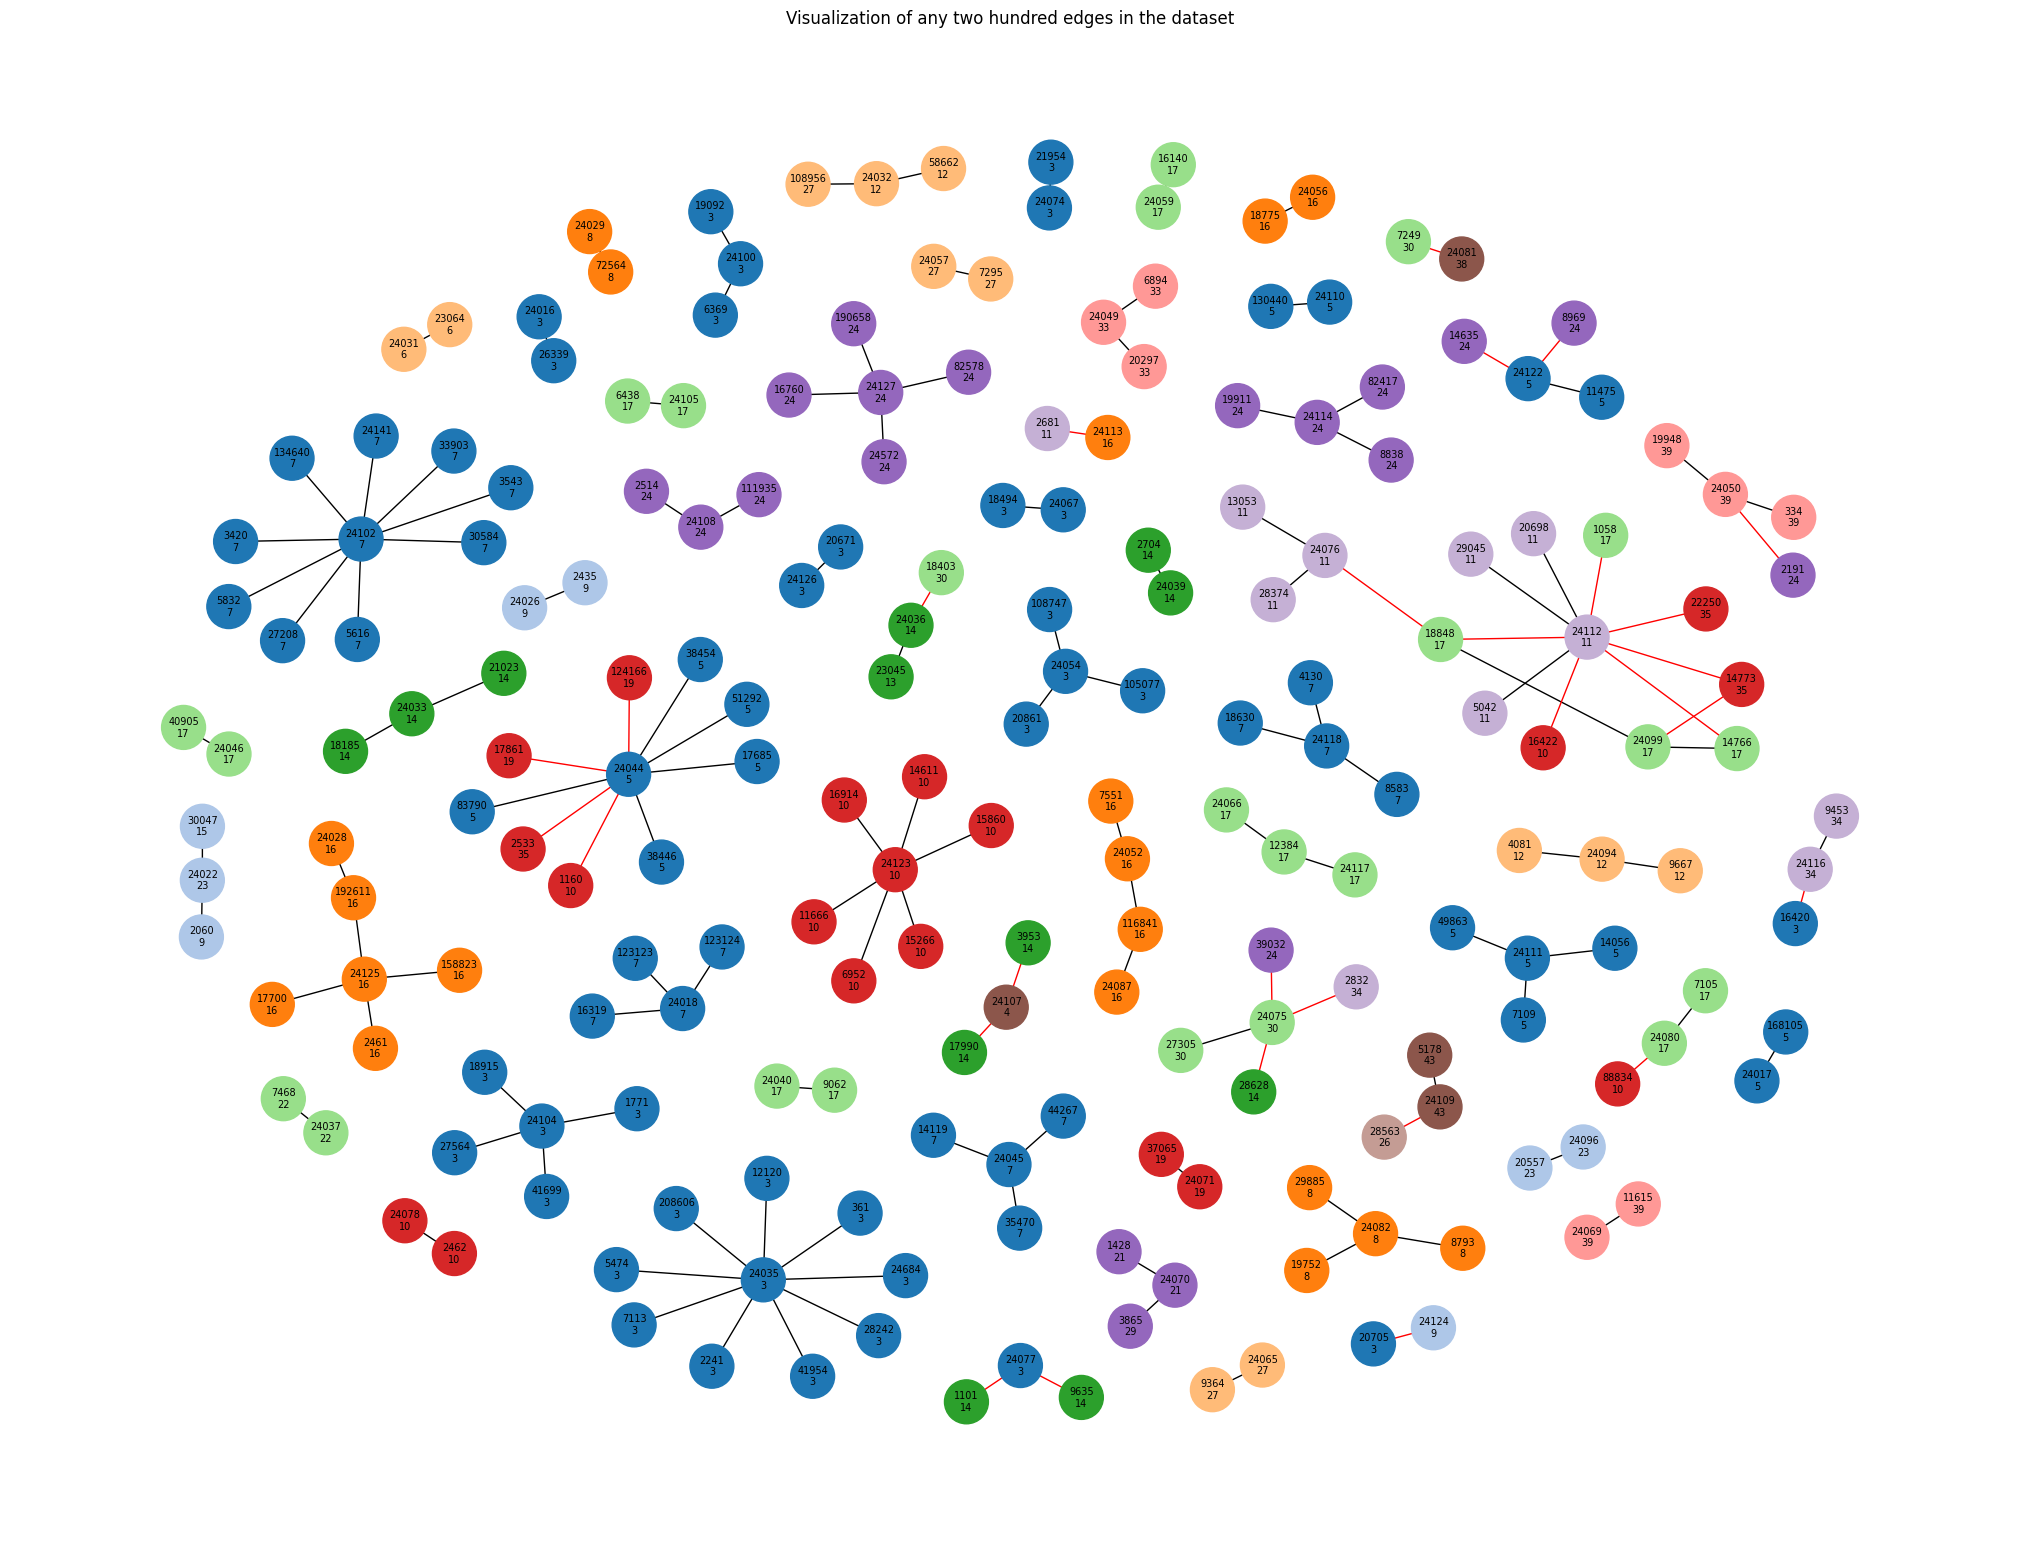

In [37]:
G = nx.Graph(edge_list[20000:20200])
draw_network(G, color_num, 48)

In [7]:
# ogbn-arxiv dataset visualization

In [1]:
from ogb.nodeproppred import NodePropPredDataset

dataset_name = 'ogbn-arxiv'
dataset = NodePropPredDataset(name = dataset_name)
graph, label = dataset[0] # graph: library-agnostic graph object

D:\anaconda\envs\graph\lib\site-packages\ogb\nodeproppred\dataset.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_dict = torch.load(pre_processed_file_path)


In [2]:
label = label.flatten().tolist()
color_num = len(set(label))
color_num

40

In [3]:
edge_list = list(zip(graph["edge_index"][0], graph["edge_index"][1]))  # 配对起点和终点
edge_list.sort(key=lambda x: x[0])
sorted_list = [[value[0], value[1]] for value in edge_list]
sorted_list[:10]

[[np.int64(0), np.int64(93487)],
 [np.int64(0), np.int64(52893)],
 [np.int64(1), np.int64(141692)],
 [np.int64(2), np.int64(168209)],
 [np.int64(2), np.int64(18735)],
 [np.int64(2), np.int64(119218)],
 [np.int64(2), np.int64(22689)],
 [np.int64(2), np.int64(50646)],
 [np.int64(2), np.int64(158293)],
 [np.int64(2), np.int64(80266)]]

In [5]:
def customized_edges(data, label_list):
    edge_list = []
    for row in data:
        edge_start = str(row[0]) + '\n' + str(label_list[row[0]])
        edge_end = str(row[1]) + '\n' + str(label_list[row[1]])
        edge = (edge_start, edge_end)
        
        edge_list.append(edge)
    
    print(edge_list[:10])
    return edge_list

edge_list = customized_edges(sorted_list, label)

[('0\n4', '93487\n24'), ('0\n4', '52893\n24'), ('1\n5', '141692\n28'), ('2\n28', '168209\n16'), ('2\n28', '18735\n28'), ('2\n28', '119218\n28'), ('2\n28', '22689\n28'), ('2\n28', '50646\n28'), ('2\n28', '158293\n28'), ('2\n28', '80266\n28')]


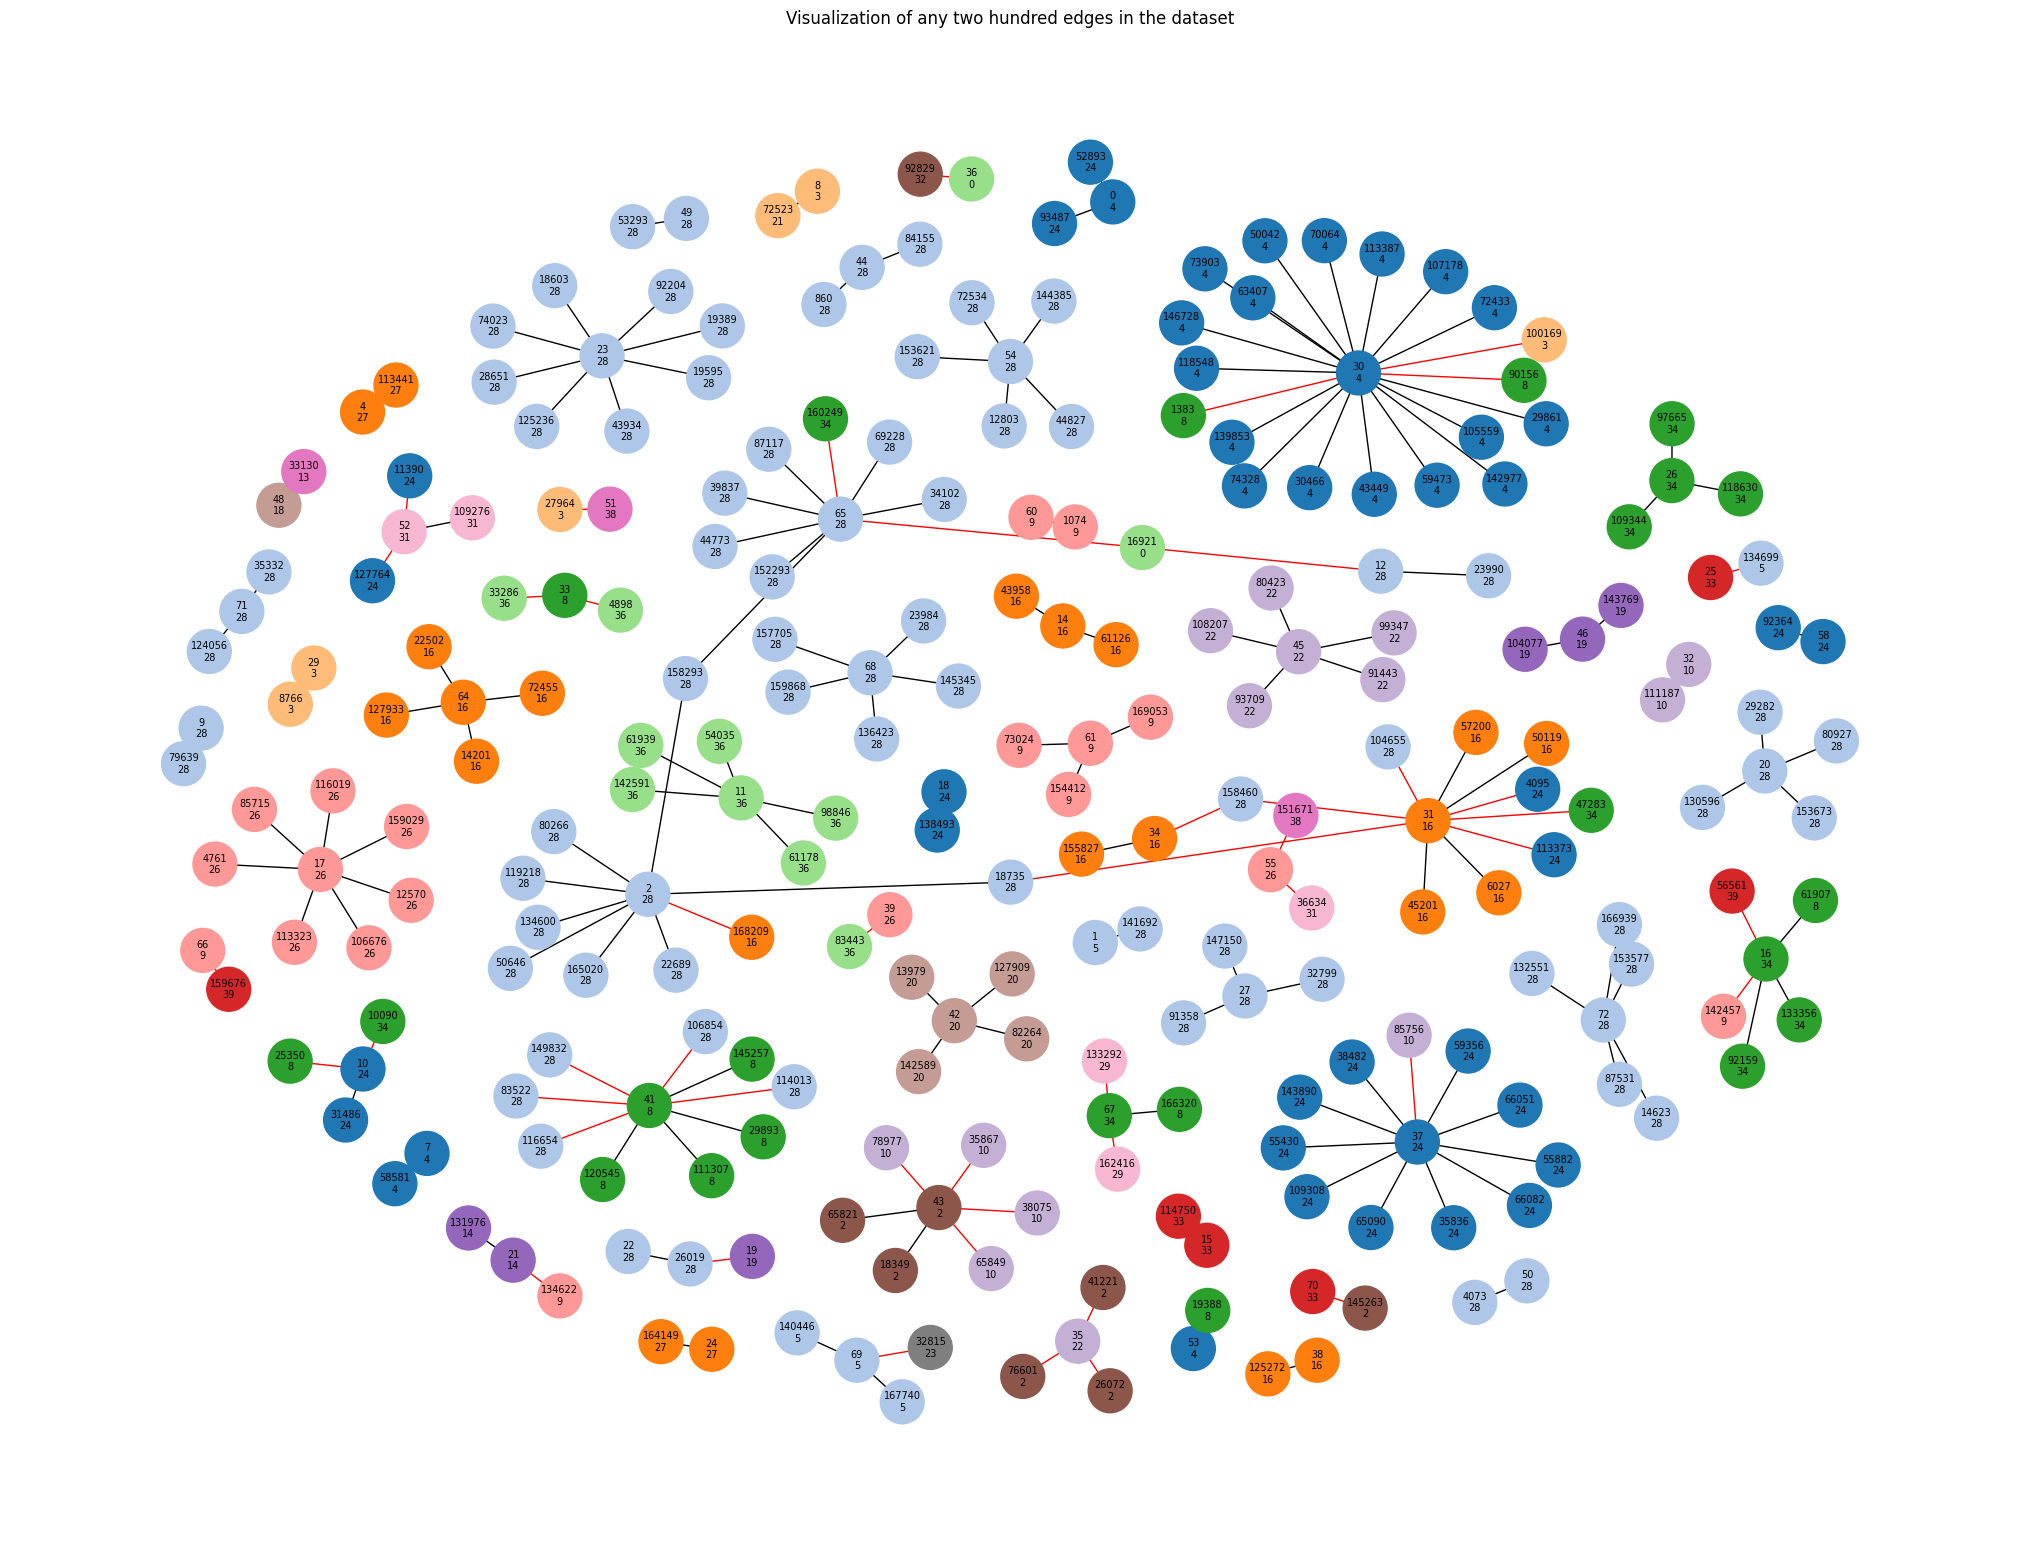

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图对象

G = nx.Graph(edge_list[:200])
draw_network(G, color_num, 46)

In [6]:
def customized_edges(data, label_list):
    edge_label_list = [0, 0]
    for row in data:
        edge_label_1 = label_list[row[0]]
        edge_label_2 = label_list[row[1]]
        if edge_label_1 != edge_label_2:
            edge_label_list[1] += 1
        else:
            edge_label_list[0] += 1
    
    print(edge_label_list)
    return edge_label_list

edge_label_list = customized_edges(sorted_list, label)

[763986, 402257]


<Figure size 800x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x21821e521a0>,
 [Text(-1.060372099384095, -0.5617926760360685, 'Same domain reference'),
  Text(0.9720074671879234, 0.5149771681646849, 'Different domain reference')],
 [Text(-0.6185503913073886, -0.3277123943543733, '65.5%'),
  Text(0.5301858911934128, 0.28089663718073715, '34.5%')])

(np.float64(-1.1927825338801374),
 np.float64(1.1044180980634877),
 np.float64(-1.1491567296272027),
 np.float64(1.1023407966489145))

Text(0.5, 1.0, 'Citations across fields')

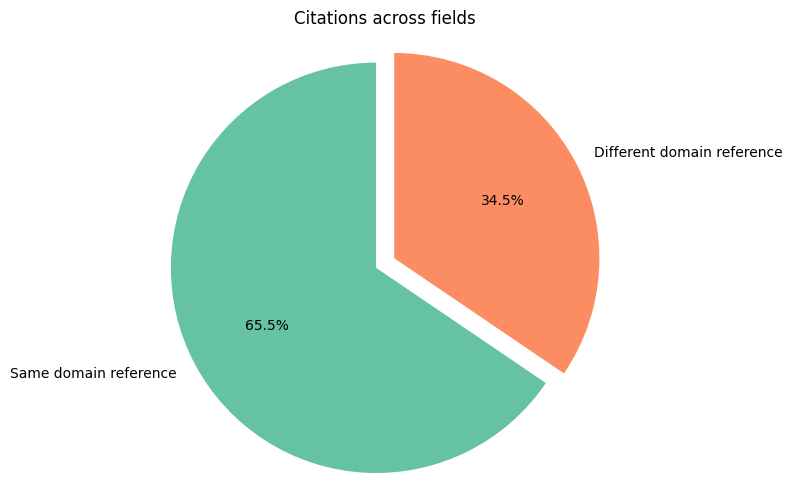

In [7]:
import matplotlib.pyplot as plt

# 数据
labels = ['Same domain reference', 'Different domain reference']
colors = ['#66c2a5', '#fc8d62']
explode = (0.1, 0)  # 仅突出显示合格部分

# 创建饼图
plt.figure(figsize=(8, 6))
plt.pie(edge_label_list, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 使饼图为圆形
plt.title('Citations across fields')
plt.show()